### Task 1: Import libraries

In [1]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image
from matplotlib import pyplot as plt
print('Using TensorFlow ', tf.__version__)

Using TensorFlow  1.14.0


### Task 2: Rotation

In [2]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
rotation_range=40
)

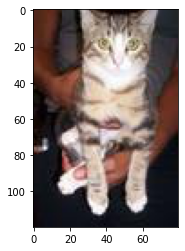

In [13]:
image_path = '/home/shrinidhi/ML-concepts/data-augmentation/images/train/cat.jpg'
plt.imshow(plt.imread(image_path))

Found 1 images belonging to 1 classes.


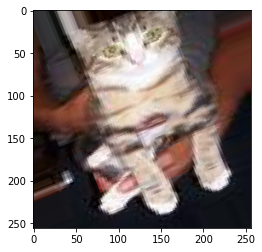

In [14]:
x, y = next(generator.flow_from_directory('/home/shrinidhi/ML-concepts/data-augmentation/images/', batch_size=1))
plt.imshow(x[0].astype('uint8'))

### Task 3: Width and Height Shifts

In [19]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=[-100, -25, 0, 25, 100],
    height_shift_range=[-25, 0, 25]
)

Found 1 images belonging to 1 classes.


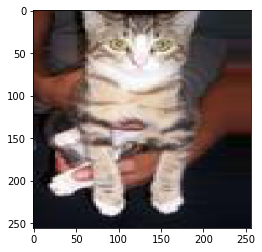

In [20]:
x, y = next(generator.flow_from_directory('/home/shrinidhi/ML-concepts/data-augmentation/images/', batch_size=1))
plt.imshow(x[0].astype('uint8'))

### Task 4: Brightness

Found 1 images belonging to 1 classes.


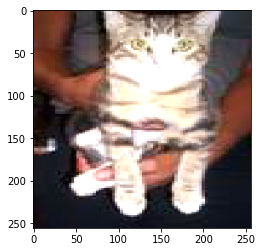

In [21]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range=(0.5, 2)
)

x, y = next(generator.flow_from_directory('/home/shrinidhi/ML-concepts/data-augmentation/images/', batch_size=1))
plt.imshow(x[0].astype('uint8'))

### Task 5: Shear Transformation

Found 1 images belonging to 1 classes.


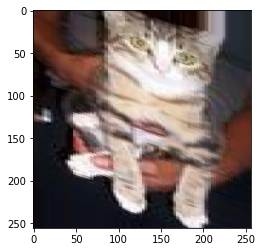

In [22]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=40
)

x, y = next(generator.flow_from_directory('/home/shrinidhi/ML-concepts/data-augmentation/images/', batch_size=1))
plt.imshow(x[0].astype('uint8'))

### Task 6: Zoom

Found 1 images belonging to 1 classes.


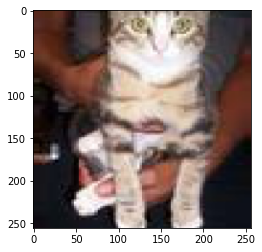

In [23]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=[0.5, 1.2]
)

x, y = next(generator.flow_from_directory('/home/shrinidhi/ML-concepts/data-augmentation/images/', batch_size=1))
plt.imshow(x[0].astype('uint8'))

### Task 7: Channel Shift

Found 1 images belonging to 1 classes.


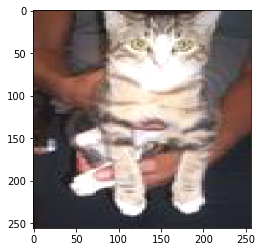

In [24]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range=100
)

x, y = next(generator.flow_from_directory('/home/shrinidhi/ML-concepts/data-augmentation/images/', batch_size=1))
plt.imshow(x[0].astype('uint8'))

In [25]:
print(x.mean())
print(np.array(Image.open(image_path)).mean())

120.50467
96.86680555555556


### Task 8: Flips

Found 1 images belonging to 1 classes.


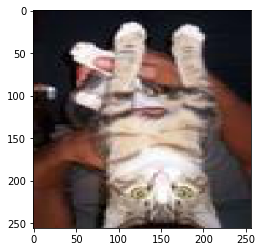

In [26]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True
)

x, y = next(generator.flow_from_directory('/home/shrinidhi/ML-concepts/data-augmentation/images/', batch_size=1))
plt.imshow(x[0].astype('uint8'))

### Task 9: Normalization

In [29]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True
)
generator.fit(x_train)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

-0.063368045 1.1136591 [[1]]
120.70756512369792


### Samplewise

In [30]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True
)
generator.fit(x_train)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

1.291434e-07 0.99999994 [[4]]


### Task 10: Rescale and preprocessing function

In [32]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

-0.114151835 0.39286673 [[9]]


### Task 11: Using in model training

In [33]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip=True,
    rotation_range=20
)

model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
    include_top=False, input_shape=(32, 32, 3),
    pooling='avg'
    ),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

_ = model.fit(generator.flow(x_train, y_train, batch_size=32), epochs=1, steps_per_epoch=10)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
10/10 [==============================] - 14s 1s/step - loss: 3.3037 - acc: 0.1187
